In [22]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [54]:
ls ../data/lpz_2016_2017/processed/images | head -4

CHIL - D02-BMT1-JU16_00128.JPG
CHIL - D02-BMT1-JU16_00129.JPG
CHIL - D02-BMT1-JU16_00130.JPG
CHIL - D02-BMT1-JU16_00131.JPG


In [15]:
labels_2017 = pd.read_csv('../data/lpz_2016_2017/processed/labels.csv')

In [16]:
labels_2017.head()

,filename,label,grayscale,mean_brightness,date,location
0,CHIL - D02-BMT1-JU16_00128.JPG,human,0.0,52.990674,12-Jul-16,BMT1
1,CHIL - D02-BMT1-JU16_00129.JPG,human,0.0,121.413798,12-Jul-16,BMT1
2,CHIL - D02-BMT1-JU16_00130.JPG,empty,0.0,90.377277,12-Jul-16,BMT1
3,CHIL - D02-BMT1-JU16_00131.JPG,human,0.0,107.500902,12-Jul-16,BMT1
4,CHIL - D02-BMT1-JU16_00132.JPG,human,1.0,197.944264,12-Jul-16,BMT1


<BarContainer object of 29 artists>

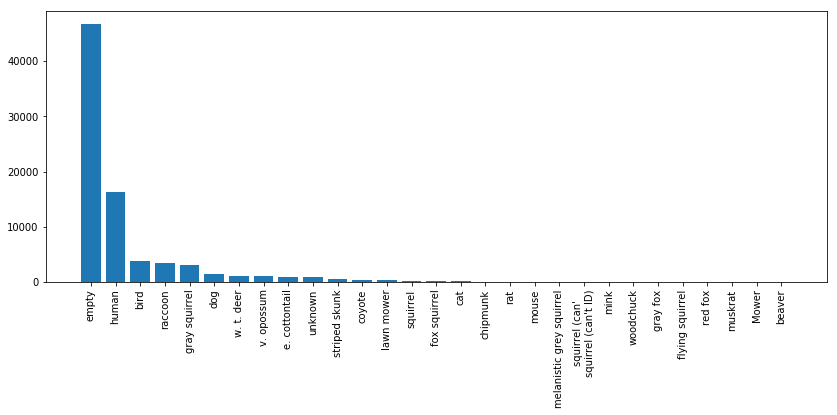

In [48]:
plt.figure(figsize=(14,5))
plt.xticks(rotation=90)
plt.bar(labels_2017.label.value_counts().index, labels_2017.label.value_counts())

In [17]:
labels_2014 = pd.read_csv('../data/lpz_2012-2014/lpz_2012-2014/raw/labels.csv')

In [53]:
labels_2014.Species.value_counts()

Empty                     23959
Human                     21982
Gray squirrel              5551
Dom dog                    3302
Raccoon                    2750
Deer                       2648
Opossum                    2435
Coyote                     1415
Rabbit                     1328
Unknown                     981
Car                         950
Squirrel                    918
Canada goose                887
Fox squirrel                833
Dom cat                     574
Bird                        516
Robin                       422
Mallard                     388
Mower                       372
Skunk                       357
Gray Squirrel               318
Grackle                     273
Bike                        188
Mouse                       179
Other vehicle               162
Rat                         145
Red fox                     133
Pigeon                       78
Starling                     72
House sparrow                43
                          ...  
Blue Jay

<BarContainer object of 93 artists>

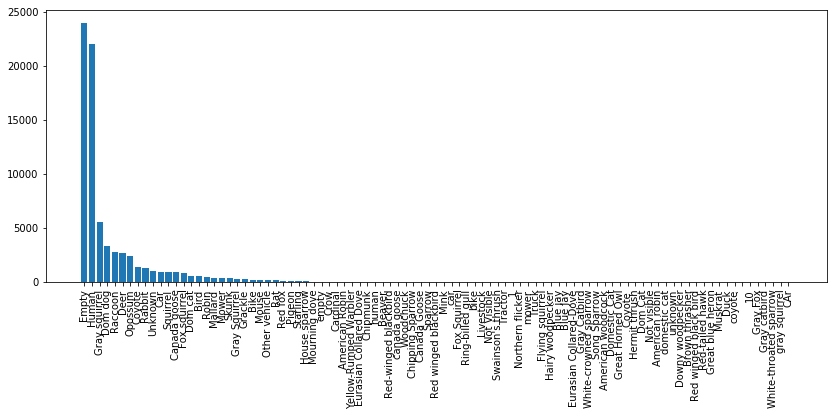

In [47]:
plt.figure(figsize=(14,5))
plt.xticks(rotation=90)
plt.bar(labels_2014.Species.value_counts().index, labels_2014.Species.value_counts())

In [56]:
unique_labels_14 = labels_2014.Species.apply(lambda x: x.lower()).value_counts().index
unique_labels_17 = labels_2017.label.value_counts().index

In [71]:
labels_2014.Species = labels_2014.Species.apply(lambda x: x.lower())

0              coyote
1              coyote
2              coyote
3              coyote
4              rabbit
5              rabbit
6               empty
7              rabbit
8              coyote
9              coyote
10             coyote
11              empty
12              empty
13            unknown
14             coyote
15              empty
16              empty
17              empty
18              empty
19              empty
20             rabbit
21             coyote
22              skunk
23              empty
24            unknown
25            unknown
26              empty
27              empty
28             rabbit
29             rabbit
             ...     
74530           empty
74531           human
74532           human
74533           human
74534         dom dog
74535         dom dog
74536           human
74537    canada goose
74538           human
74539           empty
74540           human
74541           human
74542           human
74543           human
74544     

In [88]:
# Replace bird species with 'bird'

labels_replacement_birds = ['house sparrow', 'eurasian collared-dove', 'crow', 'starling', 
                      'yellow-rumped warbler', 'chipping sparrow', 'great horned owl',
                      'american woodcock', 'northern flicker', 'downy woodpecker',
                      'white-throated sparrow', 'great blue heron', 'grackle',
                      "swainson's thrush", 'gray catbird', 'red-tailed hawk',
                      'cardinal', 'hermit thrush', 'american robin',
                      'red winged blackbird', 'pigeon', 'sparrow', 'ring-billed gull',
                      'mallard', 'mourning dove', 'red-winged blackbird',
                      'eurasian collared dove', 'white-crowned sparrow', 'hairy woodpecker',
                      'red winged black bird', 'blue jay', 'song sparrow', 'robin',
                      'brown thrasher'
                           ]
labels_2014 = labels_2014.replace(to_replace=labels_replacement_birds, value='bird')

In [92]:
print(f"All unique in 2017 - 14:\n {unique_labels_17.tolist()}\n\n")

print(f"All unique 2014:\n {set(labels_2014.Species.value_counts().index.tolist()) - set(unique_labels_14.intersection(unique_labels_17).tolist())}")

All unique in 2017 - 14:
 ['empty', 'human', 'bird', 'raccoon', 'gray squirrel', 'dog', 'w. t. deer', 'v. opossum', 'e. cottontail', 'unknown', 'striped skunk', 'coyote', 'lawn mower', 'squirrel', 'fox squirrel', 'cat', 'chipmunk', 'rat', 'mouse', 'melanistic grey squirrel', "squirrel (can'\nsquirrel (can't ID)", 'mink', 'woodchuck', 'gray fox', 'flying squirrel', 'red fox', 'muskrat', 'Mower', 'beaver']


All unique 2014:
 {'skunk', 'mower', 'duck', 'deer', 'coyote ', 'truck', 'other vehicle', 'dom dog', 'not visible', 'car', '`', 'rabbit', 'livestock', '10', 'canada goose', 'tractor', 'opossum', 'bike', 'domestic cat', '1', 'dom cat'}


In [105]:
labels_2014[labels_2014.Species == 'dom cat']

,Merge,Survey ID,Date,Time,Species,Empty,Human,Vehicle,# Individuals,picturename,concatenate,filename_build,duplicate,original
968,D05-ADC1-WI12_02/06/2012_19:39,D05-ADC1-WI12,2/6/2012,19:39,dom cat,0,0,0,1,366,D05-ADC1-WI12 366,WI12/DPT/D05-ADC1-WI12/D05-ADC1-WI12 (366).JPG,0,1231
969,D05-ADC1-WI12_02/06/2012_20:02,D05-ADC1-WI12,2/6/2012,20:02,dom cat,0,0,0,1,367,D05-ADC1-WI12 367,WI12/DPT/D05-ADC1-WI12/D05-ADC1-WI12 (367).JPG,0,1232
986,D05-ADC1-WI12_02/09/2012_4:28,D05-ADC1-WI12,2/9/2012,4:28,dom cat,0,0,0,1,346,D05-ADC1-WI12 346,WI12/DPT/D05-ADC1-WI12/D05-ADC1-WI12 (346).JPG,0,1252
3968,D03-CHP1-WI12_02/07/2012_22:51,D03-CHP1-WI12,2/7/2012,22:51,dom cat,0,0,0,1,2319,D03-CHP1-WI12 2319,WI12/DPT/D03-CHP1-WI12/D03-CHP1-WI12 (2319).JPG,0,5233
3969,D03-CHP1-WI12_02/07/2012_22:52,D03-CHP1-WI12,2/7/2012,22:52,dom cat,0,0,0,1,2320,D03-CHP1-WI12 2320,WI12/DPT/D03-CHP1-WI12/D03-CHP1-WI12 (2320).JPG,0,5234
4024,D03-CHP1-WI12_02/08/2012_21:28,D03-CHP1-WI12,2/8/2012,21:28,dom cat,0,0,0,1,2652,D03-CHP1-WI12 2652,WI12/DPT/D03-CHP1-WI12/D03-CHP1-WI12 (2652).JPG,0,5311
4025,D03-CHP1-WI12_02/08/2012_21:28,D03-CHP1-WI12,2/8/2012,21:28,dom cat,0,0,0,1,2653,D03-CHP1-WI12 2653,WI12/DPT/D03-CHP1-WI12/D03-CHP1-WI12 (2653).JPG,0,5313
4026,D03-CHP1-WI12_02/08/2012_21:29,D03-CHP1-WI12,2/8/2012,21:29,dom cat,0,0,0,1,2654,D03-CHP1-WI12 2654,WI12/DPT/D03-CHP1-WI12/D03-CHP1-WI12 (2654).JPG,0,5315
4193,D02-SCP1-WI12_01/24/2012_21:02,D02-SCP1-WI12,1/24/2012,21:02,dom cat,0,0,0,1,1601,D02-SCP1-WI12 1601,WI12/DPT/D02-SCP1-WI12/D02-SCP1-WI12 (1601).JPG,0,5545
4803,D03-AMP1-SP12_04/21/2012_3:52,D03-AMP1-SP12,4/21/2012,3:52,dom cat,0,0,0,1,39,D03-AMP1-SP12 39,SP12/DPT/D03-AMP1-SP12/D03-AMP1-SP12 (39).JPG,0,6360


In [106]:
['10', '`', ]

['10', '`']